<a href="https://colab.research.google.com/github/ziedjouini/aiplanet/blob/main/Challenge_Decision_Tree_zied_aiplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the dataset
The data points were collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables - Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

Data Description
The dataset contains 9568 observations with 5 features/variables.

AT: Ambient Temperature - Numerical (values ranges from 1.81°C to 37.11°C)

AP: Ambient Pressure - Numerical (values ranges from 992.89 to 1033.30 milibar)

RH: Relative Humidity - Numerical (values ranges from 25.56% to 100.16%)

EV: Exhaust Vacuum - Numerical (values ranges from 25.36-81.56 cm Hg)

PE: Net hourly electrical energy output - Numerical (values ranges from 420.26-495.76 MW)

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
#import librairie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')
df

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68
...,...,...,...,...,...
6405,23.39,61.87,1010.35,48.91,444.03
6406,11.63,40.55,1022.89,87.12,474.67
6407,27.79,69.23,1012.86,45.71,435.06
6408,12.26,41.50,1014.87,89.41,471.13


In [3]:
df.describe()

,AT,EV,AP,RH,PE
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,19.652120,54.298786,1013.227959,73.324212,454.363276
std,7.433792,12.685055,5.932562,14.675569,17.060129
min,1.810000,25.360000,992.890000,26.300000,420.260000
25%,13.580000,41.760000,1009.070000,63.352500,439.832500
50%,20.420000,52.080000,1012.955000,74.980000,451.440000
75%,25.720000,66.540000,1017.257500,84.897500,468.270000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


Features consist of hourly average ambient variables - Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score

In [5]:
X = df.drop(['PE'],axis=1)
y = df['PE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state = 42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 6410
The length of the train dataset is   : 5128
The length of the test dataset is    : 1282


In [11]:
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
 modelDTR.score(X_test,y_test) 

0.9200185568551286

In [13]:
print("score d'exactitude (accuracy) sur l'ensemble d'entraînement :",modelDTR.score(X_train, y_train))
print("score d'exactitude (accuracy) sur l'ensemble de test :",modelDTR.score(X_test, y_test))

score d'exactitude (accuracy) sur l'ensemble d'entraînement : 1.0
score d'exactitude (accuracy) sur l'ensemble de test : 0.9200185568551286


In [14]:
# prediction in the training dataset
y_train_pred=modelDTR.predict(X_train)

In [17]:
print('the R2_score is :', r2_score(y_train,y_train_pred))

the R2_score is : 1.0


In [18]:
#m:training model evaluation
from sklearn.metrics import mean_absolute_error , mean_squared_error
#the MAE and MSE
print('the MAE is :',mean_absolute_error(y_train,y_train_pred))
print('the MSE is :',mean_squared_error(y_train,y_train_pred))

the MAE is : 0.0
the MSE is : 0.0


In [19]:
#predict testing data 
y_test_pred=modelDTR.predict(X_test)
print('the testing  R2_score is :%.2f'% r2_score(y_test,y_test_pred))

the testing  R2_score is :0.92


In [34]:
predict=modelDTR.predict(X_test)
predict

array([435.72, 439.66, 483.54, ..., 468.74, 472.88, 440.76])

In [35]:
df_pred=pd.DataFrame(predict,columns=['predict'])
df_pred

,predict
0,435.72
1,439.66
2,483.54
3,440.07
4,481.53
...,...
1277,448.77
1278,447.88
1279,468.74
1280,472.88


In [36]:
df_join_pred=df.join(df_pred)
df_join_pred

,AT,EV,AP,RH,PE,predict
0,29.95,73.42,1011.44,66.32,432.81,435.72
1,5.76,40.07,1013.22,62.99,494.67,439.66
2,29.44,64.33,1011.40,61.78,442.32,483.54
3,32.83,74.33,1011.44,50.42,427.36,440.07
4,16.86,39.63,1004.47,83.50,466.68,481.53
...,...,...,...,...,...,...
6405,23.39,61.87,1010.35,48.91,444.03,NaN
6406,11.63,40.55,1022.89,87.12,474.67,NaN
6407,27.79,69.23,1012.86,45.71,435.06,NaN
6408,12.26,41.50,1014.87,89.41,471.13,NaN


In [20]:
#en plus
# Print each feature with importance %

# solution 1
for i in range(0,len(X.columns)):
    print(f'Colonne :{X.columns[i]} \nImportance %: {round(modelDTR.feature_importances_[i] * 100,2)} \n')

Colonne :AT 
Importance %: 87.55 

Colonne :EV 
Importance %: 9.15 

Colonne :AP 
Importance %: 1.67 

Colonne :RH 
Importance %: 1.64 



In [21]:
# solution 2
DF_impfeat = pd.DataFrame({"columns": X.columns,
                           "imp_features": modelDTR.feature_importances_})
DF_impfeat.sort_values("imp_features", ascending=False)

,columns,imp_features
0,AT,0.875476
1,EV,0.091489
2,AP,0.016659
3,RH,0.016375


In [24]:
"""import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize = (10,10))

plot_tree(modelDTR, filled = True,  
          feature_names=X_train.columns )
plt.show()"""

'import matplotlib.pyplot as plt\nfrom sklearn.tree import plot_tree\n\n\nplt.figure(figsize = (10,10))\n\nplot_tree(modelDTR, filled = True,  \n          feature_names=X_train.columns )\nplt.show()'

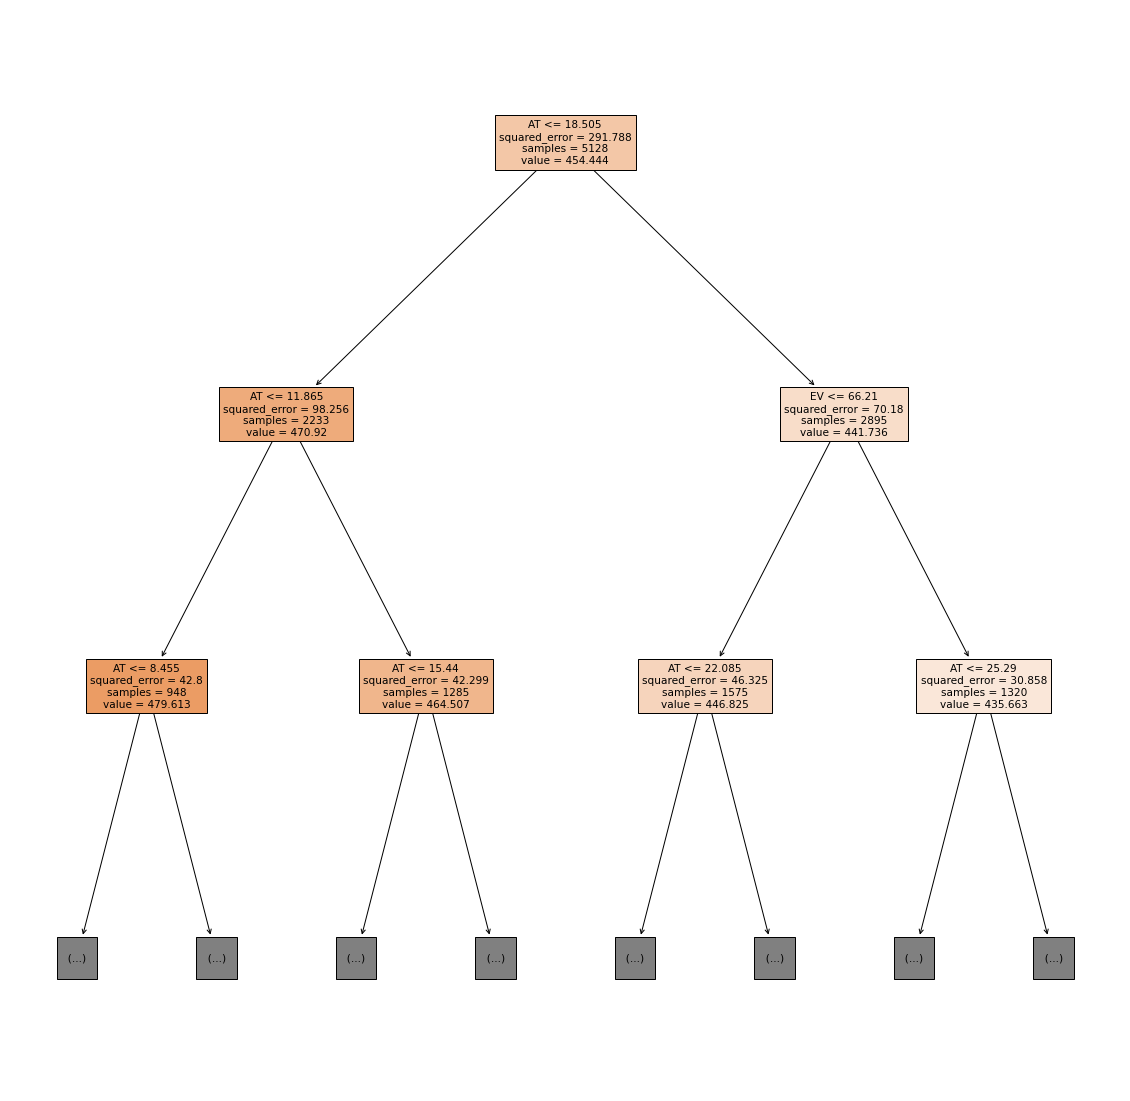

In [23]:
# Plot the results
# Use column names as feature names and a max_depth of only 2

plt.figure(figsize = (20,20))
tree.plot_tree(modelDTR, max_depth = 2, filled = True,
          feature_names = X_train.columns )
plt.show()